<div>
    <img src="img/Logo.png" align="right" width="200"</img>
</div>
<br/> 

# Segmentation - Region Growing

In this exercise, we focus on segmentation algorihms. 
First, we are looking at region growing. 

# Task Region Growing:

**Load the following libraries into your project**:
- matplotlib.pyplot as plt
- numpy as np

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**Load an example image** (e.g. RegionGrowingExample.jpg) using $imread$ from $pyplot$! Note how the methods saves the image in terms of rows and columns. <br>**Display the image**:

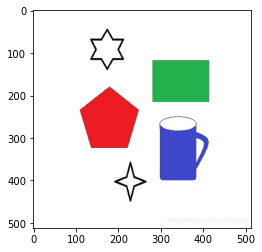

In [2]:
originalImage = plt.imread('./Images/RegionGrowingExample.jpg')
plt.figure()
plt.imshow(originalImage, 'gray')

To analyze the image, we have to convert it from RGB to grayscale (if you imported a colored image). For this purpose use the following code, where $img$ is your loaded image:
```python
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
```
**Convert and display your image!**

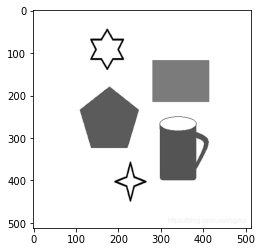

In [3]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(originalImage[...,:3], rgb_weights)
plt.imshow(grayscale_image, 'gray')

For the region growing algorithm, we have to select seed-points from which the algorithm starts. <br>**Define an array of seed points**:

In [4]:
seeds = [(150,250), (350,150)]

Starting from the seeds, neighboring pixels(2D)/voxels(3D) are examined. In this exercise we will restrict ourselves to the 2D case and therefore use the term pixel. To calculate neighboring pixels, we need to define in which directions these pixels are located. There are the 4- and the 8-neighborhood. **Define two arrays with which you can easily calculate neighboring pixel-coordinates from the seeds**:

In [5]:
# 4-neighborhood
directions4 = [(-1,-1),(1,1),(-1,1),(1,-1)]
# 8-neighborhood
directions8 = [(-1,-1),(1,1),(-1,1),(1,-1),(-1,0),(1,0),(0,-1),(0,1)]

**Create two data structures!** One for the resulting image and one to store information whether a pixel has been analyzed. Use the following code to define the datatype:
```python
dtype=np.uint8
```

In [6]:
result = np.zeros(shape=originalImage.shape, dtype=np.uint8)
visited = np.zeros(shape=originalImage.shape, dtype=np.uint8)

**Implement the Region Growing Algorithm from the following Structogram:**

<center><img src="RegionGrowing.svg"></center>

In [7]:
threshold = 127

h=originalImage.shape[0]
w=originalImage.shape[1]

while len(seeds):
    seed = seeds.pop(0)
    seed_x = seed[0]
    seed_y = seed[1]
    result[seed_y][seed_x] = 255
    visited[seed_y][seed_x] = 1
    for direction in directions8:
        cur_x = seed_x + direction[0]
        cur_y = seed_y + direction[1]
        if (cur_x<0 or cur_y<0 or cur_x>=w or cur_y>=h):
            continue
        if (not visited[cur_y][cur_x][0]) and (grayscale_image[cur_y][cur_x]<threshold):
            result[cur_y][cur_x] = 255
            visited[cur_y][cur_x] = 1
            seeds.append((cur_x,cur_y))        

**Display your result:**

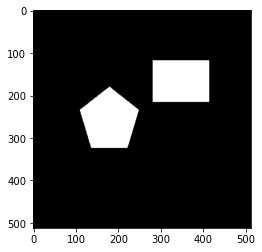

In [8]:
plt.imshow(result, 'gray')

**Vary the threshold and seed points to segment all stuctures inside your image!**

**What happens if you change your neighborhood from 4- to 8-neighborhood or vice versa?**